# OpenAI Chat Experiment Example

## Installations

In [1]:
# !pip install --quiet --force-reinstall prompttools

## Setup imports and API keys

First, we'll need to set our API keys. If we are in DEBUG mode, we don't need to use a real OpenAI key, so for now we'll set them to empty strings.

In [13]:
import os

os.environ["DEBUG"] = "1"  # Set this to "" to call OpenAI's API
os.environ["OPENAI_API_KEY"] = ""  # Insert your key here

Then we'll import the relevant `prompttools` modules to setup our experiment.

In [3]:
from typing import Dict, List
from prompttools.experiment import OpenAIChatExperiment

## Run an experiment

Next, we create our test inputs. We can iterate over models, inputs, and configurations like temperature.

In [4]:
models = ["gpt-3.5-turbo", "gpt-3.5-turbo-0613"]  # You can also use a fine-tuned model here, e.g. ["ft:gpt-3.5-turbo:org_id"]
messages = [
    [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Who was the first president?"},
    ]
]
temperatures = [0.0, 1.0]
# You can add more parameters that you'd like to test here.

experiment = OpenAIChatExperiment(models, messages, temperature=temperatures)

We can then run the experiment to get results.

In [5]:
experiment.run()

In [6]:
experiment.visualize()

,model,messages,temperature,response,response_usage,latency
0,gpt-3.5-turbo,"[{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Who was the first president?'}]",0.0,George Washington,"{'completion_tokens': 18, 'prompt_tokens': 57, 'total_tokens': 75}",0.000006
1,gpt-3.5-turbo,"[{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Who was the first president?'}]",1.0,George Washington,"{'completion_tokens': 18, 'prompt_tokens': 57, 'total_tokens': 75}",0.000005
2,gpt-3.5-turbo-0613,"[{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Who was the first president?'}]",0.0,George Washington,"{'completion_tokens': 18, 'prompt_tokens': 57, 'total_tokens': 75}",0.000003
3,gpt-3.5-turbo-0613,"[{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Who was the first president?'}]",1.0,George Washington,"{'completion_tokens': 18, 'prompt_tokens': 57, 'total_tokens': 75}",0.000002


## Evaluate the model response

To evaluate the results, we'll define an eval function. We can use semantic distance to check if the model's response is similar to our expected output.

Since we are using semantic similarity, you need to have the library `sentence_transformers` installed.

In [7]:
# !pip install --quiet sentence_transformers

In [8]:
from prompttools.utils import similarity

In [9]:
experiment.evaluate("similar_to_expected", similarity.semantic_similarity, expected=["George Washington"] * 4)

Finally, we can visualize the results.

In [10]:
experiment.visualize()

,model,messages,temperature,response,response_usage,latency,similar_to_expected
0,gpt-3.5-turbo,"[{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Who was the first president?'}]",0.0,George Washington,"{'completion_tokens': 18, 'prompt_tokens': 57, 'total_tokens': 75}",0.000006,1.0
1,gpt-3.5-turbo,"[{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Who was the first president?'}]",1.0,George Washington,"{'completion_tokens': 18, 'prompt_tokens': 57, 'total_tokens': 75}",0.000005,1.0
2,gpt-3.5-turbo-0613,"[{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Who was the first president?'}]",0.0,George Washington,"{'completion_tokens': 18, 'prompt_tokens': 57, 'total_tokens': 75}",0.000003,1.0
3,gpt-3.5-turbo-0613,"[{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Who was the first president?'}]",1.0,George Washington,"{'completion_tokens': 18, 'prompt_tokens': 57, 'total_tokens': 75}",0.000002,1.0


## Saving to Remote

For users interested to manage their experiments in a hosted environment. We provide APIs to securely store your experiments in our backend, from which you can load experiments for re-run or share with your team. 

If you are interested in our hosted solution, please reach out to us.

In [11]:
os.environ["HEGELAI_API_KEY"] = ""

## Aggregate Results

You can optionally visualize the results with the following command

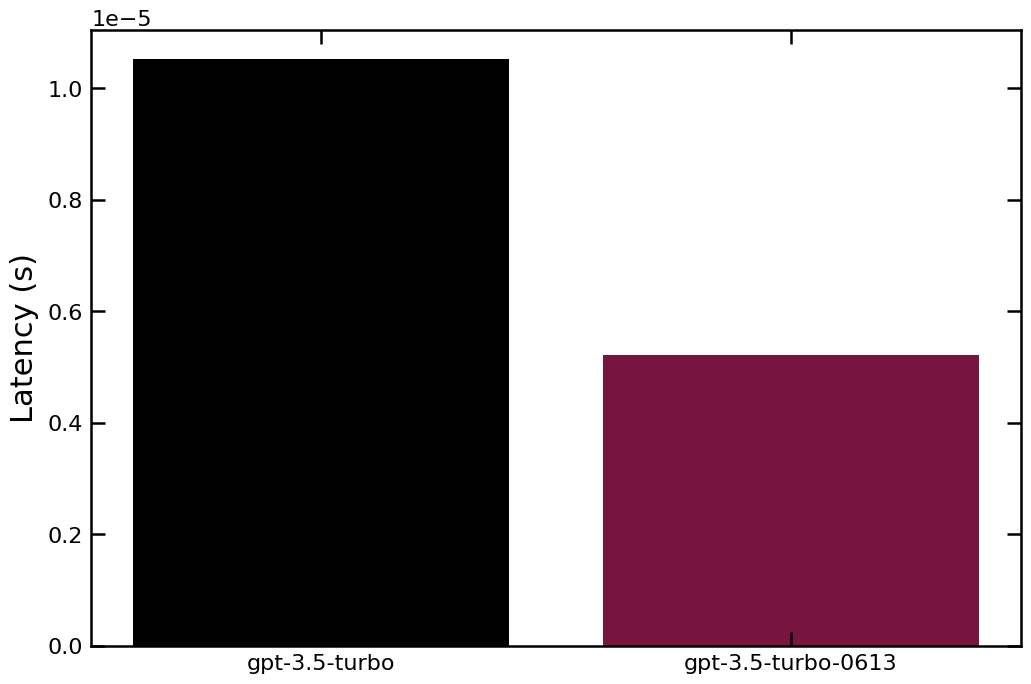

In [12]:
experiment.aggregate(metric_name="latency", column_name="model")